### 統計學習與深度學習 HW2

### b07902126 謝宗儒 資工三

### 第一題 [Data Preprocessing]

In [8]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#%matplotlib inline
#30000*102

dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

with open("adult.data") as data:
    x_train = np.array([line.strip('\n').split(', ')[:-1]for line in data])
with open("adult.data") as data:
    Y_train = np.array([line.strip('\n').split(', ')[-1]for line in data])

x_train = np.delete(x_train, -1, axis = 0)
Y_train = np.delete(Y_train, -1, axis = 0)

with open("adult.test") as test:
    x_test = np.array([line.strip('.\n').split(', ')[:-1]for line in test])
with open("adult.test") as test:  
    Y_test = np.array([line.strip('.\n').split(', ')[-1]for line in test])

x_test = np.delete(x_test, 0, axis = 0)
Y_test = np.delete(Y_test, 0, axis = 0)
x_test = np.delete(x_test, -1, axis = 0)
Y_test = np.delete(Y_test, -1, axis = 0)

# delete empty value
de_list = []
for i in range(x_train.shape[0]):
    for j in range(len(x_train[0])):
        if x_train[i][j] == '?':
            de_list.append(i)
x_train = np.delete(x_train, de_list, axis = 0)
Y_train = np.delete(Y_train, de_list, axis = 0)

de_list = []
for i in range(x_test.shape[0]):
    for j in range(len(x_test[0])):
        if x_test[i][j] == '?':
            de_list.append(i)
x_test = np.delete(x_test, de_list, axis = 0)
Y_test = np.delete(Y_test, de_list, axis = 0)

# for y
y_train = np.zeros(Y_train.shape)
for i in range(len(Y_train)):
	if Y_train[i] == ">50K" :
	    y_train[i] = 1

y_test = np.zeros(Y_test.shape)
for i in range(len(Y_test)):
	if Y_test[i] == ">50K" :
	    y_test[i] = 1

adult50k={'x_train':x_train,'x_test':x_test,'y_train':y_train,'y_test':y_test}

elems = ['x_train', 'x_test', 'y_train', 'y_test']
for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train 1 elements no match!
x_test 1 elements no match!
y_train match!
y_test match!


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


### 第二題 [ROC and AUC]

Q2.1 + Q2.2

Accuracy = 0.848406


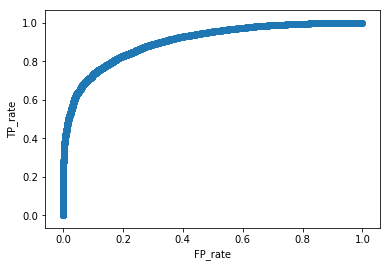

AUC= 0.9021390845070436


In [1]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
with open('adult_m50k.pickle', 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
prob = []
for i in range(len(ypred)):
	prob.append(ypredprob[i][0])

#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)

sorted_idx = sorted(range(len(prob)), reverse = True,key = lambda k : prob[k]) 

tp=[]
fp=[]
area = 0
ttnum = 0
tfnum = 0
for i in range(len(ypred)):
    if int(adult50kp['y_test'][sorted_idx[i]]) == 1:
        tfnum+=1
    elif int(adult50kp['y_test'][sorted_idx[i]]) == 0:
        ttnum+=1

for threshold in range(0, len(ypred), 5):
    fp.append(0)
    tp.append(0)
    for i in range(threshold):
        if adult50kp['y_test'][sorted_idx[i]] == 1:
            fp[int(threshold/5)]+=1
        elif adult50kp['y_test'][sorted_idx[i]] == 0:
            tp[int(threshold/5)]+=1

for i in range(len(tp)):
    tp[i]=tp[i]/ttnum
for i in range(len(fp)):
	fp[i]=fp[i]/tfnum
for i in range(1, len(tp)):
    area += (tp[i]+tp[i-1])*(fp[i]-fp[i-1])/2

fig = plt.figure()
plt.scatter(fp,tp)
plt.xlabel("FP_rate")
plt.ylabel("TP_rate")
plt.show()
fig.savefig("ROC.png")
print("AUC=",area)

### 第三題 [Logistic Regression with L2 Regularization]

Q3.1

$$E(w) = \frac{1}{2} w^T \Lambda w - \sum_{n=1}^N [ t_n \ln y_n  + (1 - t_n) \ln (1 - y_n)]\ ,\ where\ y_n = \frac{1}{1 + exp({-w^Tx_n})}$$
<br>
<br>
$$Let\ z_1 = \sum_{n=1}^N (t_n \ln y_n)\ ,\ z_2 = \sum_{n=1}^N [(1 - t_n) \ln (1 - y_n)]\ , \ where\ y_n = \sigma (w^Tx_n)$$
<br>
<br>
$$\frac{∂z_1}{∂w} = \frac{t_n \sigma(w^Tx_n)(1 - \sigma(w^Tx_n)x_n}{ \sigma(w^Tx_n)} = t_n(1 - \sigma(w^Tx_n)x_n$$
<br>
<br>
$$\frac{∂z_2}{∂w} = \frac{(1 - t_n) \sigma(w^Tx_n)(1 - \sigma(w^Tx_n)(- x_n)}{1 - \sigma(w^Tx_n)} = (t_n - 1) \sigma(w^Tx_n)x_n$$
<br>
<br>
$$\frac{∂z_1}{∂w} + \frac{∂z_2}{∂w} = (t_n - \sigma(w^Tx_n)x_n$$
<br>
<br>
$$\nabla E(w) = \frac{∂E(w)}{∂w} = \Lambda w - \sum_{n=1}^N (t_n - \sigma(w^Tx_n)x_n = \Lambda w + \Phi^T(y-t)$$
<br>
<br>
$$Hessian = \nabla \nabla E(w) = \sum_{n=1}^N y_n (1 - y_n) x_n x_n^T + \Lambda = \Phi^T R \Phi + \Lambda \ ,\ R\ is\ a\ diagonal\ matrix\ with\ R_{nn} = y_n (1 - y_n)$$

Q3.2

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model  import LogisticRegression

class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.ans_w = []
        self.add_intercept = add_intercept

    def fit(self, x, t, verbal = False):
        if self.add_intercept:
            one = np.ones((x.shape[0], 1))
            x = np.append(x, one, axis = 1)

        w = np.identity(x.shape[1])+np.dot(np.transpose(x), x)
        w = np.linalg.inv(w)
        w = np.dot(w, np.dot(np.transpose(x), t))

        wT = np.transpose(w)
       
        last_E = 0
        #update w
        for i in range(self.max_iter) :
            sum_func = 0
            y = np.zeros((x.shape[0]))
            for j in range(x.shape[0]):
                y[j] = np.clip( 1/(1+np.exp(np.dot(-wT, x[j]))),1e-8 ,1-1e-8)
                sum_func += t[j] * np.log(y[j]) + (1 - t[j])*np.log(1-y[j])
         
            R = np.identity(y.shape[0])

            for j in range(y.shape[0]):
                R[j][j]=y[j]*(1-y[j])
            E = np.dot(np.dot(wT, self.reg_vec), w)/2 - sum_func
            print(E)
            if np.abs(last_E - E) < self.tol:
                break
            grad_E = np.dot(self.reg_vec, w) + np.dot(np.transpose(x), (y - t))
            H = np.dot(np.dot(np.transpose(x), R), x) + self.reg_vec
            w = w - np.dot(np.linalg.inv(H), grad_E)
            wT = np.transpose(w)
            last_E = E

        self.ans_w = w
        print("ans_w = ")
        print(w)

    def predict(self, x):
        """doing prediction"""
        if self.add_intercept:
            one = np.ones((x.shape[0], 1))
            x = np.append(x, one, axis = 1)
        self.ans_wt = np.transpose(self.ans_w)
        y = 1/(1+np.exp(np.dot(x, -self.ans_wt)))
        y = np.array([1 if i >= 0.5 else 0 for i in y])
        return y

np.set_printoptions(suppress=True)

#Load data
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

binary_list = [1, 3, 5, 6, 7, 8, 9, 13]
continue_list=[0, 2, 4, 10, 11, 12]

#case1
lambda_vec = np.identity(adult50kp['x_train'].shape[1])
logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = False)
logic1.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred = logic1.predict(adult50kp['x_test'])

cor_rate = 0
for i in range(ypred.shape[0]):
    if ypred[i] == adult50kp['y_test'][i] :
        cor_rate+=1

cor_rate/=ypred.shape[0]
print("mylogistic_l2 correct rate in case1:", cor_rate)

#case2
lambda_vec = np.identity(adult50kp['x_train'].shape[1]+1)
lambda_vec[-1][-1] = 0
logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred = logic1.predict(adult50kp['x_test'])

cor_rate = 0
for i in range(ypred.shape[0]):
    if ypred[i] == adult50kp['y_test'][i] :
        cor_rate+=1

cor_rate/=ypred.shape[0]
print("mylogistic_l2 correct rate in case2:", cor_rate)

#case3
lambda_vec = np.identity(adult50kp['x_train'].shape[1]+1)
binary_list = [1, 3, 5, 6, 7, 8, 9, 13]
for i in binary_list:
    lambda_vec[i][i] = 0.5
lambda_vec[-1][-1] = 0
logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred = logic1.predict(adult50kp['x_test'])

cor_rate = 0
for i in range(ypred.shape[0]):
    if ypred[i] == adult50kp['y_test'][i] :
        cor_rate+=1

cor_rate/=ypred.shape[0]
print("mylogistic_l2 correct rate in case3:", cor_rate)

MemoryError: 

藉由資工系的工作站執行結果如下：
但用自己的筆電會出現MemoryError
case1 w =
[ 0.25829766  0.35286356  2.33422001  0.76093037  0.33328473  0.07921358
 -0.419065   -0.20451832 -0.9629374  -1.33000522 -0.3288797   0.90975625
 -0.82700343 -0.08741964 -0.4336111  -0.70534447 -0.28227075 -1.59439588
 -0.7412535  -0.01306693  0.05205653  0.78777243 -0.99240259 -0.69494818
 -0.27531241 -0.82656047 -1.65298179  0.50035667  0.5744047   0.27914971
  0.64286175 -0.10294562 -0.05522085 -0.25465124 -0.20782379  0.59348693
  0.40713026 -0.02200255 -0.00265095 -0.56924112 -0.27740542 -0.24561796
 -0.10973204 -0.1785307  -0.18530458 -1.18015821  0.09228903 -0.14021619
  0.95308765  0.43076917 -0.52328048 -1.29561268  0.45661075 -0.9215973
 -0.08387461 -0.37785101  0.40295961  0.56788743  0.5513525  -0.64611801
 -0.08193625  0.06989465 -0.15796955 -0.0272489   0.01354306 -0.31896669
  0.12772485  0.4727378   0.8610213   0.12126426  0.31527275 -0.33233611
 -0.3886933  -0.38430904 -0.67919585 -0.42890423  0.417121    0.10920407
  0.11723865 -0.14731267 -0.07426403 -0.96113575 -0.05557072 -0.31865534
 -0.16974508  0.31952357 -0.8098772   0.55779359  0.34408603 -0.34313169
 -0.15401317  0.02252656 -0.64130566 -0.46470984 -1.09910161 -0.86643889
  1.32356591  0.99914097 -0.81846027 -1.35692458 -0.94010275 -0.67642978]
mylogistic_l2 correct rate in case1: 0.847808764940239

case2 w =
[ 0.25833063  0.35307341  2.33348267  0.7378757   0.33385106  0.07926886
 -0.04219571  0.1998764  -0.58360968 -0.93671312  0.07548467  1.28715745
 -0.37140328  0.39422898  0.04305748 -0.26147347  0.1955903  -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.8174378  -0.52074423
 -0.09910239 -0.64944042 -1.55235099  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.07284641 -0.11752645 -0.06282948  0.67242506
  0.5040869   0.0879909   0.11435014 -0.38483985 -0.1019631  -0.05145375
  0.10741777 -0.01997934  0.01717544 -1.16567809  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756663 -1.24002555  0.52780939 -0.86832687
 -0.02771494 -0.31412702  0.47343435  0.6298111   0.62405658 -0.58675062
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.06216039 -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160105  0.48879121  0.17662205
  0.17410342 -0.07343503 -0.0314651  -0.89846776  0.00653561 -0.27232554
 -0.12442075  0.39697177 -0.75318728  0.61067658  0.70544004  0.01789988
  0.2090388   0.382747   -0.2795817  -0.10453082 -0.9310132  -0.52642474
  1.61398954  1.36735898 -0.49235221 -1.01493649 -0.60567591 -0.34195917
 -3.17508577]
mylogistic_l2 correct rate in case2: 0.8477423638778221

case3 w =
[ 0.25833906  0.35309667  2.33361525  0.74660005  0.33377554  0.07930532
 -0.20873449  0.02890137 -0.76123311 -1.11523357 -0.09408313  1.12223303
 -0.32896086  0.44341855  0.0872637  -0.22008401  0.24007189 -0.42742204
  0.42742204  0.1639562   0.22820316  0.96442112 -0.81761833 -0.52081013
 -0.0992794  -0.64967708 -1.55068063  0.67826522  0.75049438  0.45517696
  0.81825591  0.07293089  0.08311439 -0.11050927 -0.05918232  0.69197488
  0.5226578   0.10474055  0.12760383 -0.39494823 -0.10854783 -0.06485943
  0.08431108 -0.01977058  0.00033644 -1.16186097  0.28092392  0.02401574
  1.00686417  0.50306784 -0.4603232  -1.23892946  0.52901132 -0.8673405
 -0.02610949 -0.31310034  0.47428041  0.6303951   0.62486613 -0.58583773
 -0.02880018  0.1253378  -0.14363576  0.02184541  0.06284218 -0.25066269
  0.19503888  0.52677882  0.93299993  0.18812347  0.3779492  -0.28975877
 -0.30943846 -0.33220882 -0.65088297 -0.38104976  0.4865651   0.17771971
  0.17505152 -0.07204439 -0.03113152 -0.90159722  0.00368501 -0.27422017
 -0.12439277  0.39804251 -0.75584187  0.6114046   0.70539126  0.01790338
  0.20907002  0.38270919 -0.27957598 -0.10458267 -0.9309152  -0.52526703
  1.61097951  1.36382541 -0.49122674 -1.01300327 -0.60455882 -0.34074905
 -3.04714189]
mylogistic_l2 correct rate in case3: 0.847675962815405

Q3.3

In [ ]:
# random shuffle
np.random.seed(10)
randomize = np.arange(len(adult50kp['x_train']))
np.random.shuffle(randomize)
x_subtrain = adult50kp['x_train'][randomize][:int(len(adult50kp['x_train'])*0.9)]
x_tuning = adult50kp['x_train'][randomize][int(len(adult50kp['x_train'])*0.9):]
y_subtrain = adult50kp['y_train'][randomize][:int(len(adult50kp['y_train'])*0.9)]
y_tuning = adult50kp['y_train'][randomize][int(len(adult50kp['y_train'])*0.9):]


# set the grid
grid = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 25, 50, 100]

for i in range(len(grid)):
    lambda_vec = grid[i] * np.identity(x_subtrain.shape[1]+1)
    lambda_vec[-1][-1] = 0
    
    logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 100, tol = 1e-5, add_intercept = True)
    logic1.fit(x_subtrain, y_subtrain)
    ypred = logic1.predict(x_tune)
    print("grid = "+str(grid[i])+", test accuracy = "+str(accuracy(ypred, y_tune)))

grid = 0.01, correct rate = 0.8478621146834604
grid = 0.05, correct rate = 0.848193569771296
grid = 0.1, correct rate = 0.848193569771296
grid = 0.5, correct rate = 0.8478621146834604
grid = 1, correct rate = 0.848193569771296
grid = 5, correct rate = 0.8501823002983095
grid = 10, correct rate = 0.8491879350348028
grid = 25, correct rate = 0.8488564799469672
grid = 50, correct rate = 0.848193569771296
grid = 100, correct rate = 0.848193569771296

In [ ]:
# set a1* = 5
grid_best = 5
for i in range(len(grid)):
    lambda_vec = grid[i] * np.identity(x_subtrain.shape[1]+1)
    for j in binary_list:
        lambda_vec[j][j] = grid_best
    lambda_vec[-1][-1] = 0
    
    logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 100, tol = 1e-5, add_intercept = True)
    logic1.fit(x_subtrain, y_subtrain)
    ypred = logic1.predict(x_tuning)
    cor_rate = 0
    for j in range(y_tuning.shape[0]):
        if ypred[j] == y_tuning[j] :
            cor_rate+=1
    cor_rate/=ypred.shape[0]
    print("grid = "+str(grid[i])+", correct rate = "+str(cor_rate))
    print("a1 = "+str(grid_best)+", a2 = "+str(grid[i])+", correct rate = "+str(cor_rate))

# set a2* = 5
grid_best = 5
for i in range(len(grid)):
    lambda_vec = grid[i] * np.identity(x_subtrain.shape[1]+1)
    for j in continue_list:
        lambda_vec[j][j] = grid_best
    lambda_vec[-1][-1] = 0
    
    logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 100, tol = 1e-5, add_intercept = True)
    logic1.fit(x_subtrain, y_subtrain)
    ypred = logic1.predict(x_tuning)
    cor_rate = 0
    for j in range(y_tuning.shape[0]):
        if ypred[j] == y_tuning[j] :
            cor_rate+=1
    cor_rate/=ypred.shape[0]
    print("grid = "+str(grid[i])+", correct rate = "+str(cor_rate))
    print("a1 = "+str(grid[i])+", a2 = "+str(grid_best)+", correct rate = "+str(cor_rate))

a1 = 5, a2 = 0.01, correct rate = 0.8484250135591316
a1 = 5, a2 = 0.05, correct rate = 0.8484250135591316
a1 = 5, a2 = 0.1, correct rate = 0.8485250255591316
a1 = 5, a2 = 0.5, correct rate = 0.8472002045077892
a1 = 5, a2 = 1, correct rate = 0.8478621347034604
a1 = 5, a2 = 5, correct rate = 0.8501823003023095
a1 = 5, a2 = 10, correct rate = 0.8495194101236383
a1 = 5, a2 = 25, correct rate = 0.8495194101236383
a1 = 5, a2 = 50, correct rate = 0.8485250252631316
a1 = 5, a2 = 100, correct rate = 0.848193669841296

a1 = 0.01, a2 = 5, correct rate = 0.849850847330474
a1 = 0.05, a2 = 5, correct rate = 0.849850847330474
a1 = 0.1, a2 = 5, correct rate = 0.849850846230474
a1 = 0.5, a2 = 5, correct rate = 0.849850846230474
a1 = 1, a2 = 5, correct rate = 0.8501823002983095
a1 = 5, a2 = 5, correct rate = 0.8501823003023095
a1 = 10, a2 = 5, correct rate = 0.8488534793469672
a1 = 25, a2 = 5, correct rate = 0.8488534793469672
a1 = 50, a2 = 5, correct rate = 0.8491881360358028
a1 = 100, a2 = 5, correct rate = 0.848193619881296

In [ ]:
# a1* = 5, a2* = 5
a1 = 5
a2 = 5
lambda_vec = a2 * np.identity(x_subtrain.shape[1]+1)
for i in continue_list:
    lambda_vec[i][i] = a1
for i in binary_list:
    lambda_vec[i][i] = a2
lambda_vec[-1][-1] = 0
logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred = logic1.predict(adult50kp['x_test'])
cor_rate = 0
for j in range(adult50kp['y_test'].shape[0]):
    if ypred[j] == adult50kp['y_test'] :
        cor_rate+=1
cor_rate/=ypred.shape[0]
print("correct rate = ", cor_rate)

correct rate =  0.848605578329243

Q3.4

In [ ]:
#library logisticRegression
logic2=LogisticRegression()
logic2.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred = logic2.predict(adult50kp['x_test'])

cor_rate = 0
for i in range(ypred.shape[0]):
    if ypred[i] == adult50kp['y_test'][i] :
        cor_rate+=1
cor_rate/=ypred.shape[0]
print("logistic_regression correct rate :", cor_rate)

logistic_regression correct rate : 0.847476759628154